<a href="https://colab.research.google.com/github/Parsayarya/House-prices-prediction/blob/main/house_price_pred0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

**Loadind DataSets** and geting a general info

In [ ]:
dftr = pd.read_csv ('/content/train.csv')
dfte = pd.read_csv ('/content/test.csv')

In [ ]:
dftr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [ ]:
dfte.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,1459.000000,1459.000000,1232.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1444.000000,1458.000000,1458.000000,1458.000000,1458.000000,1459.000000,1459.000000,1459.000000,1459.000000,1457.000000,1457.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.00000,1381.000000,1458.000000,1458.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000
mean,2190.000000,57.378341,68.580357,9819.161069,6.078821,5.553804,1971.357779,1983.662783,100.709141,439.203704,52.619342,554.294925,1046.117970,1156.534613,325.967786,3.543523,1486.045922,0.434454,0.065202,1.570939,0.377656,2.854010,1.042495,6.385195,0.58122,1977.721217,1.766118,472.768861,93.174777,48.313914,24.243317,1.794380,17.064428,1.744345,58.167923,6.104181,2007.769705
std,421.321334,42.746880,22.376841,4955.517327,1.436812,1.113740,30.390071,21.130467,177.625900,455.268042,176.753926,437.260486,442.898624,398.165820,420.610226,44.043251,485.566099,0.530648,0.252468,0.555190,0.503017,0.829788,0.208472,1.508895,0.64742,26.431175,0.775945,217.048611,127.744882,68.883364,67.227765,20.207842,56.609763,30.491646,630.806978,2.722432,1.301740
min,1461.000000,20.000000,21.000000,1470.000000,1.000000,1.000000,1879.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,407.000000,0.000000,0.000000,407.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.00000,1895.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,1825.500000,20.000000,58.000000,7391.000000,5.000000,5.000000,1953.000000,1963.000000,0.000000,0.000000,0.000000,219.250000,784.000000,873.500000,0.000000,0.000000,1117.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.00000,1959.000000,1.000000,318.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000
50%,2190.000000,50.000000,67.000000,9399.000000,6.000000,5.000000,1973.000000,1992.000000,0.000000,350.500000,0.000000,460.000000,988.000000,1079.000000,0.000000,0.000000,1432.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,0.00000,1979.000000,2.000000,480.000000,0.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,2554.500000,70.000000,80.000000,11517.500000,7.000000,6.000000,2001.000000,2004.000000,164.000000,753.500000,0.000000,797.750000,1305.000000,1382.500000,676.000000,0.000000,1721.000000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.00000,2002.000000,2.000000,576.000000,168.000000,72.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,2919.000000,190.000000,200.000000,56600.000000,10.000000,9.000000,2010.000000,2010.000000,1290.000000,4010.000000,1526.000000,2140.000000,5095.000000,5095.000000,1862.000000,1064.000000,5095.000000,3.000000,2.000000,4.000000,2.000000,6.000000,2.000000,15.000000,4.00000,2207.000000,5.000000,1488.000000,1424.000000,742.000000,1012.000000,360.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000


In [ ]:
print(dftr.isna().sum(),'\n',dfte.isna().sum())

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64 
 Id                 0
MSSubClass         0
MSZoning           4
LotFrontage      227
LotArea            0
                ... 
MiscVal            0
MoSold             0
YrSold             0
SaleType           1
SaleCondition      0
Length: 80, dtype: int64


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

Genrating labels for **Objects**
so we would have floats int and our new defined labels instead of Objects

In [ ]:
from sklearn.preprocessing import LabelEncoder

for i in range(dftr.shape[1]):
    if dftr.iloc[:,i].dtypes == object:
        lbl = LabelEncoder()
        lbl.fit(list(dftr.iloc[:,i].values) + list(dfte.iloc[:,i].values))
        dftr.iloc[:,i] = lbl.transform(list(dftr.iloc[:,i].values))
        dfte.iloc[:,i] = lbl.transform(list(dfte.iloc[:,i].values))



making a new df with col names and Nan percentege

In [ ]:
# Collist=[]
# for i in np.arange(dftr.shape[1]):
#   n = dftr.iloc[:,i].isnull().sum() 
#   Collist.append(n)
# c = dftr.columns.values.tolist()
# f = Collist + c
# finalar=np.array(f)
# finalar = finalar.reshape(2,81)
# print(finalar)
# df = pd.DataFrame(finalar) 
# df

[['0' '0' '0' '259' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0'
  '0' '0' '0' '0' '0' '0' '0' '0' '0' '8' '0' '0' '0' '0' '0' '0' '0' '0'
  '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0'
  '0' '0' '0' '0' '0' '0' '81' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0'
  '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0']
 ['Id' 'MSSubClass' 'MSZoning' 'LotFrontage' 'LotArea' 'Street' 'Alley'
  'LotShape' 'LandContour' 'Utilities' 'LotConfig' 'LandSlope'
  'Neighborhood' 'Condition1' 'Condition2' 'BldgType' 'HouseStyle'
  'OverallQual' 'OverallCond' 'YearBuilt' 'YearRemodAdd' 'RoofStyle'
  'RoofMatl' 'Exterior1st' 'Exterior2nd' 'MasVnrType' 'MasVnrArea'
  'ExterQual' 'ExterCond' 'Foundation' 'BsmtQual' 'BsmtCond'
  'BsmtExposure' 'BsmtFinType1' 'BsmtFinSF1' 'BsmtFinType2' 'BsmtFinSF2'
  'BsmtUnfSF' 'TotalBsmtSF' 'Heating' 'HeatingQC' 'CentralAir'
  'Electrical' '1stFlrSF' '2ndFlrSF' 'LowQualFinSF' 'GrLivArea'
  'BsmtFullBath' 'BsmtHalfBath' 'FullBath' 'HalfBath' 'BedroomA

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80
0,0,0,0,259,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,81,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice


In [ ]:
 n = ((dfte.isnull() | dfte.isna()).sum() * 100 / dfte.index.size).round(2)
 list(n>80)

[False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False]

In [ ]:
for i in np.arange(dftr.shape[1]):
    n = dftr.iloc[:,i].isnull().sum() 
    
    if n > 0:
        print(list(dftr.columns.values)[i] + ': ' + str(n) + ' nans')
print("\n")
for i in np.arange(dfte.shape[1]):
    n = dfte.iloc[:,i].isnull().sum() 
    if n > 0:
        print(list(dfte.columns.values)[i] + ': ' + str(n) + ' nans')

LotFrontage: 259 nans
MasVnrArea: 8 nans
GarageYrBlt: 81 nans


LotFrontage: 227 nans
MasVnrArea: 15 nans
BsmtFinSF1: 1 nans
BsmtFinSF2: 1 nans
BsmtUnfSF: 1 nans
TotalBsmtSF: 1 nans
BsmtFullBath: 2 nans
BsmtHalfBath: 2 nans
GarageYrBlt: 78 nans
GarageCars: 1 nans
GarageArea: 1 nans


In [ ]:
percent_missing1 = dftr.isnull().sum() * 100 / len(dftr)
missing_value_dftr = pd.DataFrame({'column_name': dftr.columns,
                                 'percent_missing': percent_missing1})
missing_value_dftr

,column_name,percent_missing
Id,Id,0.000000
MSSubClass,MSSubClass,0.000000
MSZoning,MSZoning,0.000000
LotFrontage,LotFrontage,17.739726
LotArea,LotArea,0.000000
...,...,...
MoSold,MoSold,0.000000
YrSold,YrSold,0.000000
SaleType,SaleType,0.000000
SaleCondition,SaleCondition,0.000000


In [ ]:
percent_missing = dfte.isnull().sum() * 100 / len(dfte)
missing_value_dfte = pd.DataFrame({'column_name': dfte.columns,
                                 'percent_missing': percent_missing})

In [ ]:
missing_value_dfte

,column_name,percent_missing
Id,Id,0.000000
MSSubClass,MSSubClass,0.000000
MSZoning,MSZoning,0.000000
LotFrontage,LotFrontage,15.558602
LotArea,LotArea,0.000000
...,...,...
MiscVal,MiscVal,0.000000
MoSold,MoSold,0.000000
YrSold,YrSold,0.000000
SaleType,SaleType,0.000000


for spiliting

In [ ]:

train_ID = dftr['Id']
test_ID = dfte['Id']
y_train = dftr['SalePrice']
X_train = dftr.drop(['Id','SalePrice'], axis=1)
X_test = dfte.drop('Id', axis=1)

data to drop

In [ ]:
#for dropping
blacklist = ['LotFrontage','MasVnrArea','GarageYrBlt']
xtots = pd.concat([X_train, X_test])
xtots = xtots.drop(['LotFrontage','MasVnrArea','GarageYrBlt'], axis=1)
xtots = xtots.fillna(xtots.median())
print(xtots.columns.values)
print(str(xtots.shape[1]) + ' columns')

['MSSubClass' 'MSZoning' 'LotArea' 'Street' 'Alley' 'LotShape'
 'LandContour' 'Utilities' 'LotConfig' 'LandSlope' 'Neighborhood'
 'Condition1' 'Condition2' 'BldgType' 'HouseStyle' 'OverallQual'
 'OverallCond' 'YearBuilt' 'YearRemodAdd' 'RoofStyle' 'RoofMatl'
 'Exterior1st' 'Exterior2nd' 'MasVnrType' 'ExterQual' 'ExterCond'
 'Foundation' 'BsmtQual' 'BsmtCond' 'BsmtExposure' 'BsmtFinType1'
 'BsmtFinSF1' 'BsmtFinType2' 'BsmtFinSF2' 'BsmtUnfSF' 'TotalBsmtSF'
 'Heating' 'HeatingQC' 'CentralAir' 'Electrical' '1stFlrSF' '2ndFlrSF'
 'LowQualFinSF' 'GrLivArea' 'BsmtFullBath' 'BsmtHalfBath' 'FullBath'
 'HalfBath' 'BedroomAbvGr' 'KitchenAbvGr' 'KitchenQual' 'TotRmsAbvGrd'
 'Functional' 'Fireplaces' 'FireplaceQu' 'GarageType' 'GarageFinish'
 'GarageCars' 'GarageArea' 'GarageQual' 'GarageCond' 'PavedDrive'
 'WoodDeckSF' 'OpenPorchSF' 'EnclosedPorch' '3SsnPorch' 'ScreenPorch'
 'PoolArea' 'PoolQC' 'Fence' 'MiscFeature' 'MiscVal' 'MoSold' 'YrSold'
 'SaleType' 'SaleCondition']
76 columns


predicting numerical missing features

In [ ]:
for i in range(X_train.shape[1]):
	# count number of rows with missing values
	n_miss = X_train.iloc[i].isnull().sum()
	perc = n_miss / X_train.shape[0] * 100
	print('> %d, Missing: %d (%.1f%%)' % (i, n_miss, perc))

> 0, Missing: 0 (0.0%)
> 1, Missing: 0 (0.0%)
> 2, Missing: 0 (0.0%)
> 3, Missing: 0 (0.0%)
> 4, Missing: 0 (0.0%)
> 5, Missing: 0 (0.0%)
> 6, Missing: 0 (0.0%)
> 7, Missing: 1 (0.1%)
> 8, Missing: 0 (0.0%)
> 9, Missing: 0 (0.0%)
> 10, Missing: 0 (0.0%)
> 11, Missing: 0 (0.0%)
> 12, Missing: 1 (0.1%)
> 13, Missing: 0 (0.0%)
> 14, Missing: 1 (0.1%)
> 15, Missing: 0 (0.0%)
> 16, Missing: 1 (0.1%)
> 17, Missing: 0 (0.0%)
> 18, Missing: 0 (0.0%)
> 19, Missing: 0 (0.0%)
> 20, Missing: 0 (0.0%)
> 21, Missing: 0 (0.0%)
> 22, Missing: 0 (0.0%)
> 23, Missing: 0 (0.0%)
> 24, Missing: 1 (0.1%)
> 25, Missing: 0 (0.0%)
> 26, Missing: 0 (0.0%)
> 27, Missing: 0 (0.0%)
> 28, Missing: 0 (0.0%)
> 29, Missing: 0 (0.0%)
> 30, Missing: 0 (0.0%)
> 31, Missing: 1 (0.1%)
> 32, Missing: 0 (0.0%)
> 33, Missing: 0 (0.0%)
> 34, Missing: 0 (0.0%)
> 35, Missing: 0 (0.0%)
> 36, Missing: 0 (0.0%)
> 37, Missing: 0 (0.0%)
> 38, Missing: 0 (0.0%)
> 39, Missing: 1 (0.1%)
> 40, Missing: 0 (0.0%)
> 41, Missing: 0 (0.0%)
> 

In [ ]:
for i in range(X_test.shape[1]):
	# count number of rows with missing values
	n_miss = X_test.iloc[i].isnull().sum()
	perc = n_miss / X_test.shape[0] * 100
	print('> %d, Missing: %d (%.1f%%)' % (i, n_miss, perc))

> 0, Missing: 0 (0.0%)
> 1, Missing: 0 (0.0%)
> 2, Missing: 0 (0.0%)
> 3, Missing: 0 (0.0%)
> 4, Missing: 0 (0.0%)
> 5, Missing: 0 (0.0%)
> 6, Missing: 1 (0.1%)
> 7, Missing: 0 (0.0%)
> 8, Missing: 0 (0.0%)
> 9, Missing: 0 (0.0%)
> 10, Missing: 0 (0.0%)
> 11, Missing: 0 (0.0%)
> 12, Missing: 0 (0.0%)
> 13, Missing: 0 (0.0%)
> 14, Missing: 0 (0.0%)
> 15, Missing: 0 (0.0%)
> 16, Missing: 0 (0.0%)
> 17, Missing: 0 (0.0%)
> 18, Missing: 0 (0.0%)
> 19, Missing: 0 (0.0%)
> 20, Missing: 0 (0.0%)
> 21, Missing: 0 (0.0%)
> 22, Missing: 0 (0.0%)
> 23, Missing: 0 (0.0%)
> 24, Missing: 0 (0.0%)
> 25, Missing: 0 (0.0%)
> 26, Missing: 0 (0.0%)
> 27, Missing: 0 (0.0%)
> 28, Missing: 0 (0.0%)
> 29, Missing: 0 (0.0%)
> 30, Missing: 0 (0.0%)
> 31, Missing: 0 (0.0%)
> 32, Missing: 0 (0.0%)
> 33, Missing: 0 (0.0%)
> 34, Missing: 0 (0.0%)
> 35, Missing: 0 (0.0%)
> 36, Missing: 0 (0.0%)
> 37, Missing: 0 (0.0%)
> 38, Missing: 0 (0.0%)
> 39, Missing: 0 (0.0%)
> 40, Missing: 1 (0.1%)
> 41, Missing: 1 (0.1%)
> 

In [ ]:
from sklearn.impute import KNNImputer

In [ ]:
imputer = KNNImputer(n_neighbors=5, weights='uniform', metric='nan_euclidean')
imputer.fit(X_train)
Xtrain_trans = imputer.transform(X_train)
pd.DataFrame(Xtrain_trans).isna().sum().sum()

0

In [ ]:
imputer = KNNImputer(n_neighbors=5, weights='uniform', metric='nan_euclidean')
imputer.fit(X_test)
Xtest_trans = imputer.transform(X_test)
pd.DataFrame(Xtest_trans).isna().sum().sum()

0

pair plot just takes too long i did a heatmap from keggle

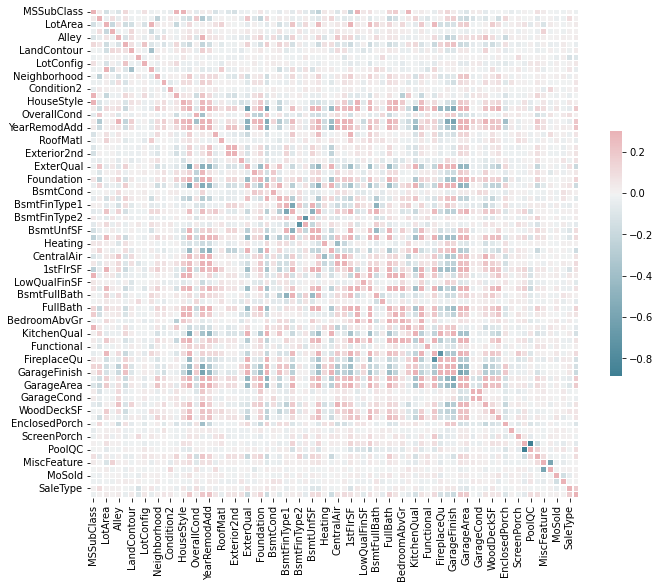

In [ ]:
X_train = xtots.iloc[:dftr.shape[0],:]
X_test = xtots.iloc[dfte.shape[0]:,:]

# Compute the correlation matrix
corr = X_train.corr()

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


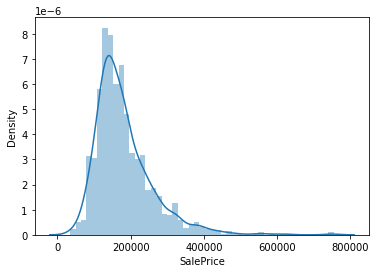

In [ ]:
ax = sns.distplot(y_train)
plt.show()

add a new feature **total sqfootage**

In [ ]:
X_train['TotalSF'] = X_train['TotalBsmtSF'] + X_train['1stFlrSF'] + X_train['2ndFlrSF']
X_test['TotalSF'] = X_test['TotalBsmtSF'] + X_test['1stFlrSF'] + X_test['2ndFlrSF']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
xtots['TotalSF'] = xtots['TotalBsmtSF'] + xtots['1stFlrSF'] + xtots['2ndFlrSF']


SVR

In [ ]:
from sklearn.svm import SVR
from sklearn.model_selection import cross_val_score
SVRmodel =  SVR(kernel='rbf')
scores = cross_val_score(SVRmodel,X_train,y_train, cv=5, scoring='neg_mean_squared_error') 
scores.mean()

-6621824439.396506

In [ ]:
from sklearn.svm import SVR
from sklearn.model_selection import cross_val_score
SVRmodel =  SVR(kernel='rbf')
scores = cross_val_score(SVRmodel,X_train,y_train, cv=5) 
scores.mean()

-0.0514290117776464

In [ ]:
from sklearn.svm import SVR
from sklearn.model_selection import cross_val_score
SVRmodel =  SVR(kernel='rbf')
scores = cross_val_score(SVRmodel,X_train,y_train, cv=5,scoring='neg_root_mean_squared_error') 
scores.mean()

-81141.55135412482

In [ ]:
from sklearn import linear_model

In [ ]:
reg = linear_model.LinearRegression()
scores = cross_val_score(reg,X_train,y_train, cv=5, scoring='neg_mean_squared_error') 
scores.mean()

-1271613176.4706078

In [ ]:
reg = linear_model.LinearRegression()
scores = cross_val_score(reg,X_train,y_train, cv=5) 
scores.mean()

0.8009783726995534

In [ ]:
reg = linear_model.LinearRegression()
scores = cross_val_score(reg,X_train,y_train, cv=5, scoring='neg_root_mean_squared_error') 
scores.mean()

-34821.820776683555

In [ ]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
xgb_model = xgb.XGBRegressor()
reg_xgb = GridSearchCV(xgb_model,
                   {'max_depth': [3,7],
                    'n_estimators': [50,100,200]}, verbose=1)
reg_xgb.fit(X_train, y_train)
print(reg_xgb.best_score_)
print(reg_xgb.best_params_)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[15:52:53] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:52:53] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[15:52:54] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:52:54] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:52:54] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:52:54] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:52:54] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:52:55] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:52:55] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:52:55] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:   15.9s finished


[15:53:09] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
0.8947800953435412
{'max_depth': 3, 'n_estimators': 200}


In [ ]:
from sklearn.linear_model import SGDRegressor


In [ ]:
model = SGDRegressor()
scores = cross_val_score(model,X_train,y_train, cv=5, scoring='neg_mean_squared_error') 
scores.mean()

-1.1212931445930033e+34

In [ ]:
model = SGDRegressor()
scores = cross_val_score(model,X_train,y_train, cv=5, scoring='neg_root_mean_squared_error') 
scores.mean()

-1.4165841096062502e+17

In [ ]:
model = SGDRegressor()
scores = cross_val_score(model,X_train,y_train, cv=5) 
scores.mean()

-2.575041520587263e+24

In [ ]:
import sklearn
sorted(sklearn.metrics.SCORERS.keys())

['accuracy',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'average_precision',
 'balanced_accuracy',
 'completeness_score',
 'explained_variance',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'fowlkes_mallows_score',
 'homogeneity_score',
 'jaccard',
 'jaccard_macro',
 'jaccard_micro',
 'jaccard_samples',
 'jaccard_weighted',
 'max_error',
 'mutual_info_score',
 'neg_brier_score',
 'neg_log_loss',
 'neg_mean_absolute_error',
 'neg_mean_gamma_deviance',
 'neg_mean_poisson_deviance',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_median_absolute_error',
 'neg_root_mean_squared_error',
 'normalized_mutual_info_score',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'r2',
 'recall',
 'recall_macro',
 'recall_micro',
 'recall_samples',
 'recall_weighted',
 'roc_auc',
 'roc_auc_ovo',
 'roc_auc_ovo_weighted',
 'roc_auc_ovr',
 'roc_auc_ovr_weighted',
 'v_measure_score']

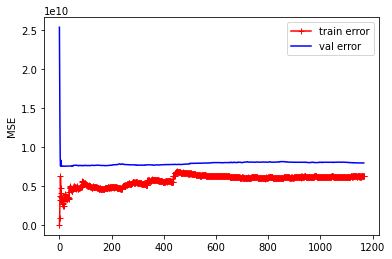

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
def draw_curve(model , x , y):
  x_train , x_val , y_train , y_val = train_test_split(x , y , test_size = 0.2)
  train_errors = []
  val_errors =[]
  for m in range(1 , len(x_train)):
    model.fit(x_train[:m] , y_train[:m])
    y_train_prd = model.predict(x_train[:m])
    y_val_prd = model.predict(x_val)

    train_errors.append(mean_squared_error(y_train[:m] , y_train_prd))
    val_errors.append(mean_squared_error(y_val , y_val_prd))
  plt.plot(train_errors , 'r-+' , label = 'train error')
  plt.plot(val_errors , 'b-' , label = 'val error')
  plt.ylabel('MSE')
  plt.legend()
  
draw_curve(SVRmodel , X_train , y_train)

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
poly_f = PolynomialFeatures(degree=3 , include_bias = True)
x_poly2 = poly_f.fit_transform(X_train)

from sklearn.linear_model import LinearRegression
reg =LinearRegression()
reg.fit(x_poly2 , y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

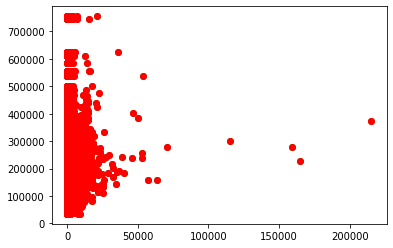

In [ ]:
plt.plot(X_train , y_train , 'o')
plt.plot(X_train , reg.predict(x_poly2)  , 'o' ,  color = 'red')
plt.show()